<a href="https://colab.research.google.com/github/AtabonfackBernes/SPARK_Projects/blob/main/week02_assignment_and_solution_medicalImageObjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Week 0-2: Object Oriented Programming in Python

Created by: **Nghi Huynh**

**Overview**:

There are **four major programming paradigms**:
* Object-oriented
* Imperical (Procedural)
* Logical
* Functional

Python is a *multi-paradigm programming language*. One of the supported paradigm in Python is **Object-Oriented Programming** (OOP). OOP is a programming paradigm that uses objects and classes in programming. 

In Python, the main concepts of Object-Oriented Programming (OOPs) follow **5 basic principles:**

1. Class
2. Objects
3. Polymorphism
4. Encapsulation
5. Inheritance

![](https://i.ibb.co/TY5hMz5/OOPs-Python.png)



Let's explore these core concepts by creating a class to load images and its annotations from a `.json` format.

But first, we need to import some libraries and install some packages!

## Import libraries and packages

In [4]:
# Loading and processing
import os
import cv2
import numpy
import shapely
from shapely import geometry
import json

# Visualization
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [5]:
# Clone the dataset repository
!git clone https://github.com/nghi-huynh/McMedHacks_W02_OOPs_Python.git

Cloning into 'McMedHacks_W02_OOPs_Python'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 76.34 KiB | 2.54 MiB/s, done.


**Note**: This is just a subset of a larger dataset (link in the references below) that I extracted and annotated for the purpose of this assignment.

## Load image and annotation

First, let's explore our dataset by loading its images and annotations!

### Image

In [6]:

# Let's set a parent path to keep track of our dataset 
PARENT_PATH = "/content/McMedHacks_W02_OOPs_Python/brain_tumor_data/"

In [7]:
# Let's load an image from the brain tumor data
img_fname = 'Y10.jpeg'
img = cv2.imread(os.path.join(PARENT_PATH, img_fname))
img.shape # check the image shape (Height, Width, #s Channels)

(360, 319, 3)

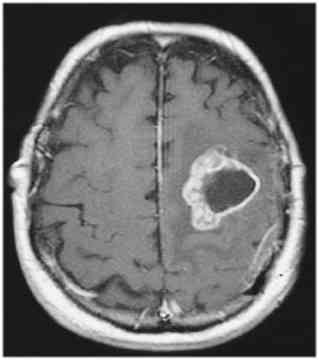

In [8]:
# Show an image
cv2_imshow(img)

### Annotation

In [9]:
with open(os.path.join(PARENT_PATH, 'via_project_brain_tumor_json.json'), 'r') as f:
  test_json = json.load(f)

In [10]:
test_json.keys() # 5 image objects

dict_keys(['Y10.jpeg8531', 'Y101.jpeg55036', 'Y105.jpeg7197', 'Y109.jpeg23211', 'Y1.jpeg5114'])

In [11]:
# Since we're loading our image (Y10.jpeg)
# we also need to load its corresponding annotation
annotations = list(test_json.values())
annotations[0]

{'filename': 'Y10.jpeg',
 'size': 8531,
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [217,
     232,
     243,
     252,
     258,
     258,
     255,
     247,
     238,
     229,
     224,
     219,
     211,
     203,
     194,
     193,
     193,
     192,
     185,
     184,
     184,
     188,
     193,
     194,
     198,
     208],
    'all_points_y': [145,
     159,
     165,
     174,
     182,
     191,
     198,
     203,
     209,
     213,
     219,
     226,
     228,
     230,
     228,
     222,
     211,
     208,
     199,
     195,
     187,
     182,
     172,
     164,
     160,
     154]},
   'region_attributes': {'tumor': ''}}],
 'file_attributes': {}}

In [12]:
# Let's check the shape attribute of this annotation
polygons = annotations[0]['regions'][0]['shape_attributes']
polygons

{'name': 'polygon',
 'all_points_x': [217,
  232,
  243,
  252,
  258,
  258,
  255,
  247,
  238,
  229,
  224,
  219,
  211,
  203,
  194,
  193,
  193,
  192,
  185,
  184,
  184,
  188,
  193,
  194,
  198,
  208],
 'all_points_y': [145,
  159,
  165,
  174,
  182,
  191,
  198,
  203,
  209,
  213,
  219,
  226,
  228,
  230,
  228,
  222,
  211,
  208,
  199,
  195,
  187,
  182,
  172,
  164,
  160,
  154]}

In [13]:
# Convert to a list with (x,y) coordinates of the polygon 
points = list(zip(polygons['all_points_x'],polygons['all_points_y']))

In [14]:
points

[(217, 145),
 (232, 159),
 (243, 165),
 (252, 174),
 (258, 182),
 (258, 191),
 (255, 198),
 (247, 203),
 (238, 209),
 (229, 213),
 (224, 219),
 (219, 226),
 (211, 228),
 (203, 230),
 (194, 228),
 (193, 222),
 (193, 211),
 (192, 208),
 (185, 199),
 (184, 195),
 (184, 187),
 (188, 182),
 (193, 172),
 (194, 164),
 (198, 160),
 (208, 154)]

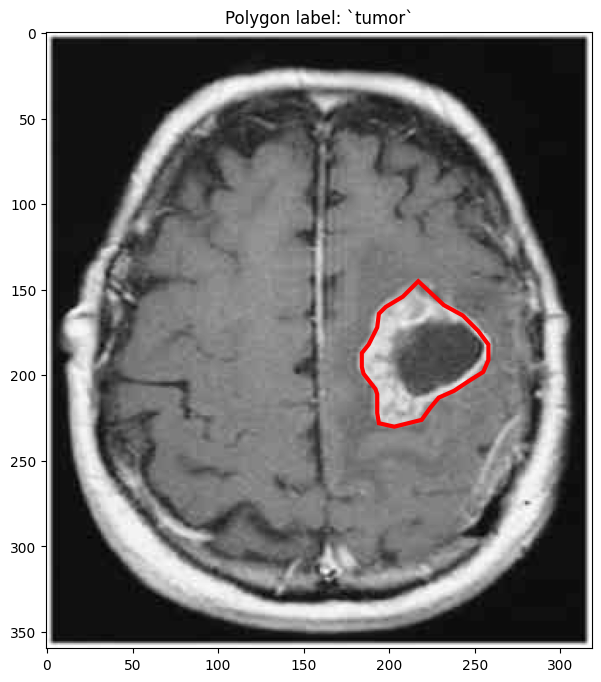

In [15]:
# Display the image and its annotation

im = Image.open(os.path.join(PARENT_PATH, img_fname))

# Create figure and axes
fig, ax = plt.subplots(figsize=(16,8))

# Display the image
ax.imshow(im, cmap='gray')

# Create a polygon
poly = patches.Polygon(xy=points, linewidth=3, edgecolor='r', facecolor='none')

# Add the polygon object to the axes 
ax.add_patch(poly)

# Add a title
ax.set_title(f"Polygon label: `tumor`")

plt.show()

## **Exercise 1**: Create an image class

### Create `BrainTumorDataset` class

In this exercise, let's create a custom `BrainTumorDataset` with the following attributes and methods:

**Attributes:**
* `parent_dir`: parent directory
* `img_id`: image id
* `json_file`: json filename
* `img_abs_path`: image absolute path
* `img`: image
* `label`: label
* `annotations`: annotations for all images

**Methods:**
* `load_json_file`: return a json file object
* `get_img`: return image id, image
* `get_annotation`: return the annotation of the image

In [16]:
class BrainTumorDataset:
  
  def __init__(self, parent_dir, json_file, img_id): 
    # add your code here
    self.parent_dir = parent_dir
    self.img_id = img_id
    self.json_file = json_file  
    self.img_abs_path = os.path.join(parent_dir,f'{img_id}')
    self.json_abs_path = os.path.join(parent_dir,json_file)
    self.img = None
    self.json = None
    self.label = 'tumor'

    try: # add your code here
      self.img = Image.open(self.img_abs_path)
    except Exception as e:
      print(f"Error reading image: {self.file_id}")
    try:   # add your code here
      self.json = self.load_json_file(parent_dir)
    except Exception as e:
      print(f"Error reading json: {self.json_file}")

    self.annotations = list(self.json.values())

  
  def load_json_file(self, path):
    json_obj = None
    # open file
    with open(self.json_abs_path, 'r') as f:
      json_obj = json.load(f)
    return json_obj
      
  def get_img(self):
    return self.img_id, self.img

  def get_annotation(self):
    points = []
    for a in self.annotations:
      if a['filename'] == img_id:
        polygons = a['regions'][0]['shape_attributes']
        points = list(zip(polygons['all_points_x'],polygons['all_points_y']))
    return points

### Instantiate an object from `BrainTumorDataset`

In [19]:
img_id = 'Y10.jpeg'
json_file = 'via_project_brain_tumor_json.json'
# PARENT_PATH =  "/content/McMedHacks_W02_OOPs_Python/brain_tumor_data/"

In [20]:
# Instantiate an object
# Add code here
brain_tumor = BrainTumorDataset(PARENT_PATH, json_file, img_id)

In [21]:
# check some info belongs to this object
id, img = brain_tumor.get_img()

In [22]:
id

'Y10.jpeg'

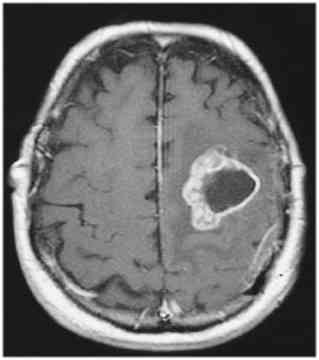

In [23]:
img

## **Exercise 2**: Create a function to display an image and its annotation

Since we're familiar with how to display an image and its annotation in the "**Load image and annotation**" part, let's refactor it into a function!

### Display image function

In [34]:
def display_images(img, points, label):

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(16,8))

    # Display the image
    ax.imshow(img, cmap='gray')


    # Create a polygon
    poly = patches.Polygon(xy = points, linewidth = 3, edgecolor = "r", facecolor = "none")

    # Add the polygon object to the axes 
    ax.add_patch(poly)

    ax.set_title(f"Polygon label: `{label}`")

    plt.show()

### Testing

In [35]:
# Set img id and json file
img_id = 'Y109.jpeg'
json_file = 'via_project_brain_tumor_json.json'

In [36]:
# instantiate an object from the BrainTumorDataset
test = BrainTumorDataset(PARENT_PATH, json_file, img_id)

In [37]:
points = test.get_annotation()
id, img = test.get_img()

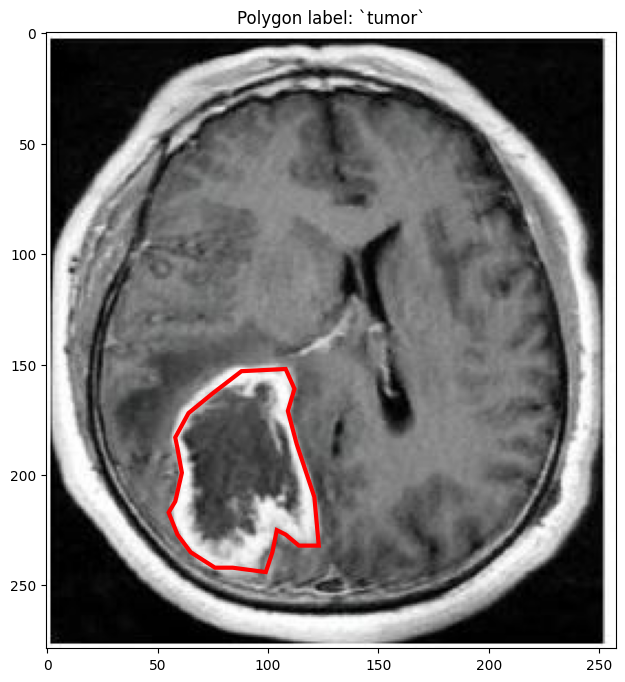

In [38]:
display_images(img, points, 'tumor')

Congratulation! You've successfully completed the second assignment! ✅

# References:

[Full brain tumor dataset](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)



#Assignment Solutions
##Only look at the solutions when you have attempted the exercises

##Create `BrainTumorDataset` class


In [ ]:
class BrainTumorDataset:
  
  def __init__(self, parent_dir, json_file, img_id): 
    self.parent_dir = parent_dir
    self.img_id = img_id
    self.json_file = json_file      
    self.img_abs_path = os.path.join(parent_dir, f"{img_id}")
    self.json_abs_path = os.path.join(parent_dir, json_file)
    self.img = None
    self.json = None
    self.label = 'tumor'

    try: 
      self.img = Image.open(self.img_abs_path)
    except Exception as e:
      print(f"Error reading image: {self.file_id}")
    try:  
      self.json = self.load_json_file(parent_dir)
    except Exception as e:
      print(f"Error reading json: {self.json_file}")

    self.annotations = list(self.json.values())

  
  def load_json_file(self, path):
    json_obj = None
    with open(self.json_abs_path, 'r') as f:
      json_obj = json.load(f)
    return json_obj
      
  def get_img(self):
    return self.img_id, self.img

  def get_annotation(self):
    points = []
    for a in self.annotations:
      if a['filename'] == img_id:
        polygons = a['regions'][0]['shape_attributes']
        points = list(zip(polygons['all_points_x'],polygons['all_points_y']))
    return points

### Instantiate an object from `BrainTumorDataset`

In [ ]:
img_id = 'Y10.jpeg'
json_file = 'via_project_brain_tumor_json.json'

In [ ]:
brain_tumor = BrainTumorDataset(PARENT_PATH, json_file, img_id)

In [ ]:
# check some info belongs to this object
id, img = brain_tumor.get_img()

In [ ]:
id

In [ ]:
img

## Display an image and its annotation


### Display image function

In [ ]:
def display_images(img, points, label):

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(16,8))

    # Display the image
    ax.imshow(img) 

    # Create a polygon
    poly = patches.Polygon(
          xy=points,
          linewidth=3,
          edgecolor='r',
          facecolor='none')

    # Add the polygon object to the axes 
    ax.add_patch(poly)

    ax.set_title(f"Polygon label: `{label}`")

    plt.show()

### Testing

In [ ]:
# Set img id and json file
img_id = 'Y109.jpeg'
json_file = 'via_project_brain_tumor_json.json'

In [ ]:
# instantiate an object from the BrainTumorDataset
test = BrainTumorDataset(PARENT_PATH, json_file, img_id)

In [ ]:
points = test.get_annotation()
id, img = test.get_img()

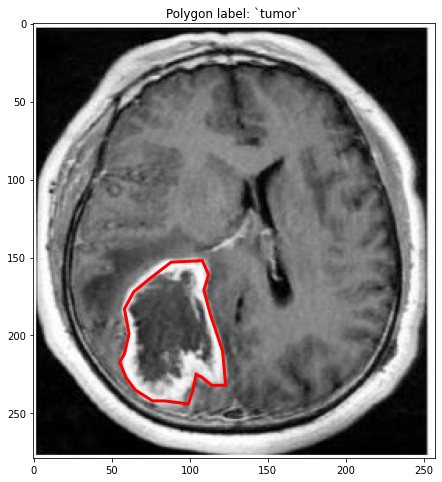

In [ ]:
display_images(img, points, 'tumor')